In [2]:
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[INFO] loading EAST text detector...
[INFO] text detection took 1.289449 seconds


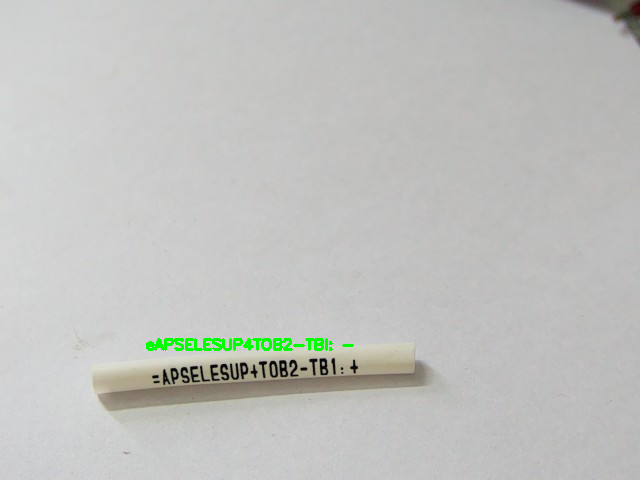

[INFO] loading EAST text detector...
[INFO] text detection took 0.588224 seconds


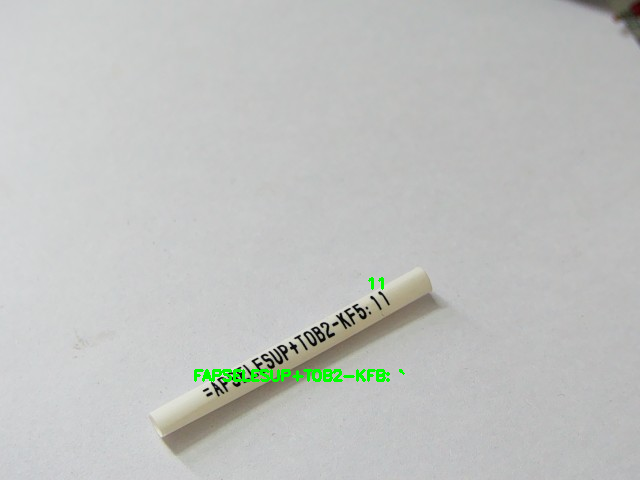

[INFO] loading EAST text detector...
[INFO] text detection took 0.533671 seconds


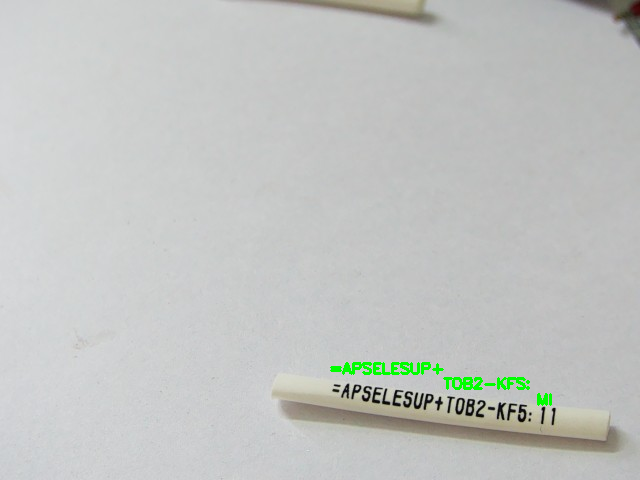

[INFO] loading EAST text detector...
[INFO] text detection took 0.657884 seconds


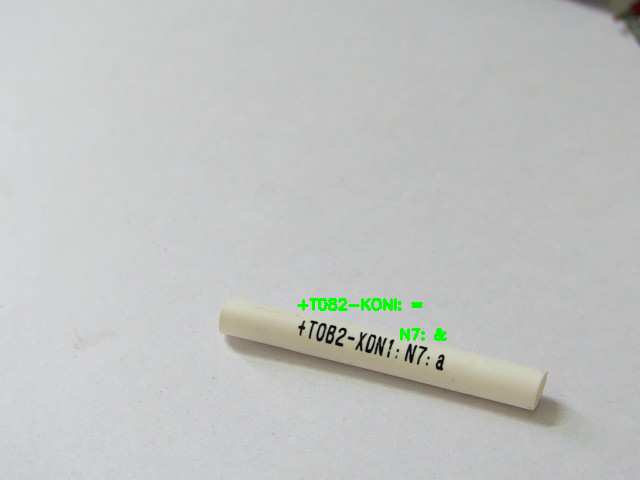

[INFO] loading EAST text detector...
[INFO] text detection took 0.539237 seconds


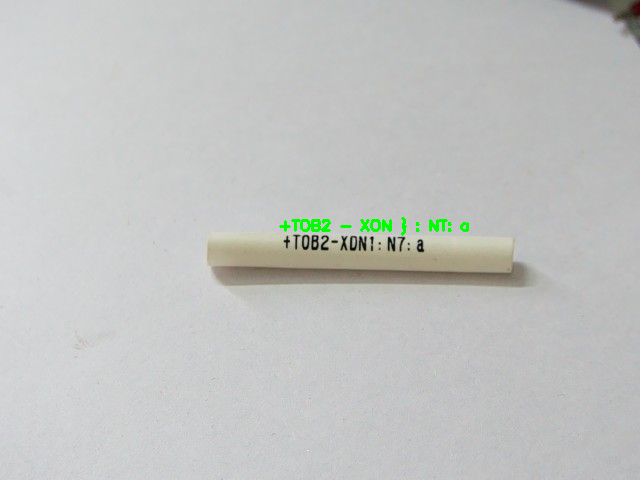

[INFO] loading EAST text detector...
[INFO] text detection took 0.845817 seconds


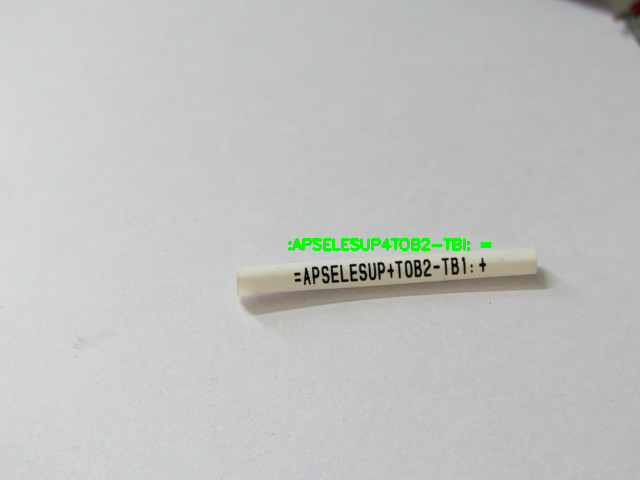

[INFO] loading EAST text detector...
[INFO] text detection took 0.516690 seconds


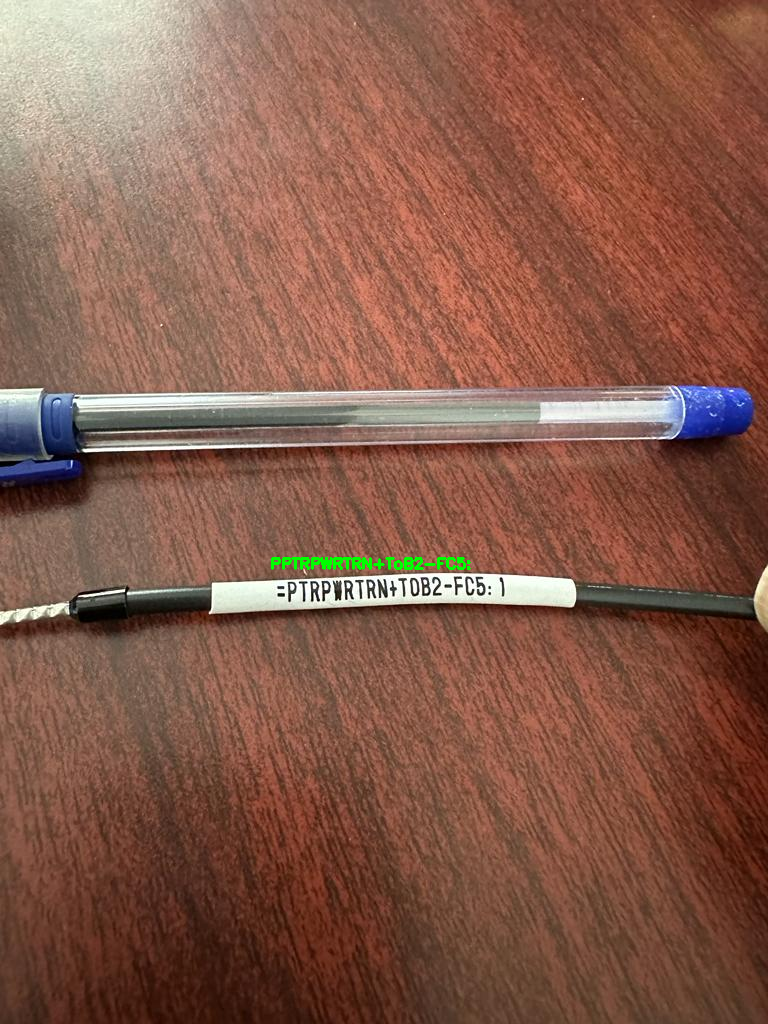

[INFO] loading EAST text detector...
[INFO] text detection took 0.505552 seconds


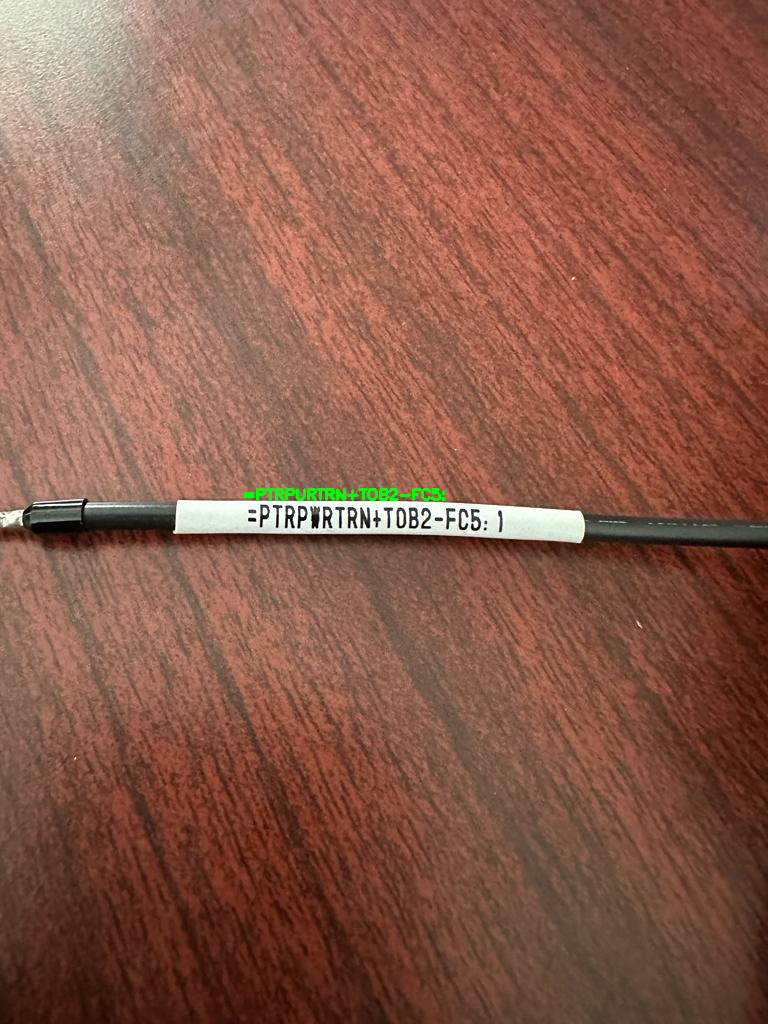

[INFO] loading EAST text detector...
[INFO] text detection took 0.539036 seconds


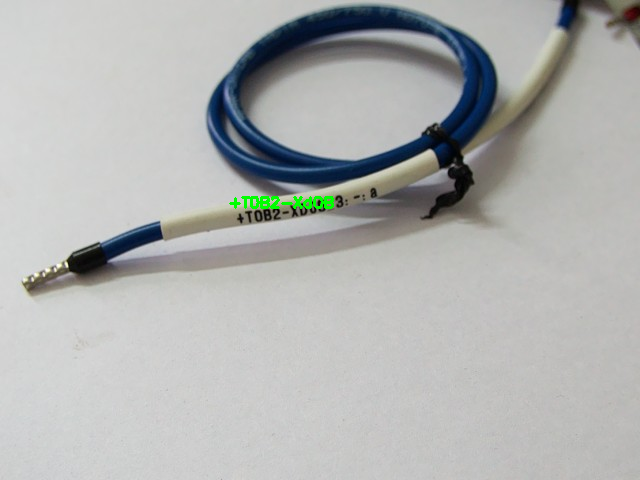

[INFO] loading EAST text detector...
[INFO] text detection took 0.862904 seconds


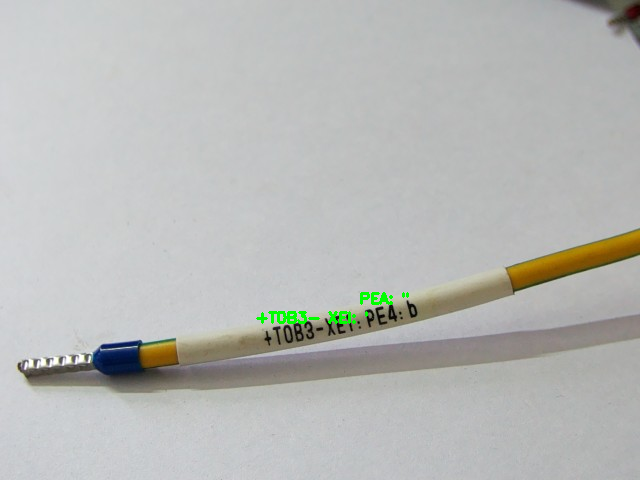

[INFO] loading EAST text detector...
[INFO] text detection took 0.526498 seconds


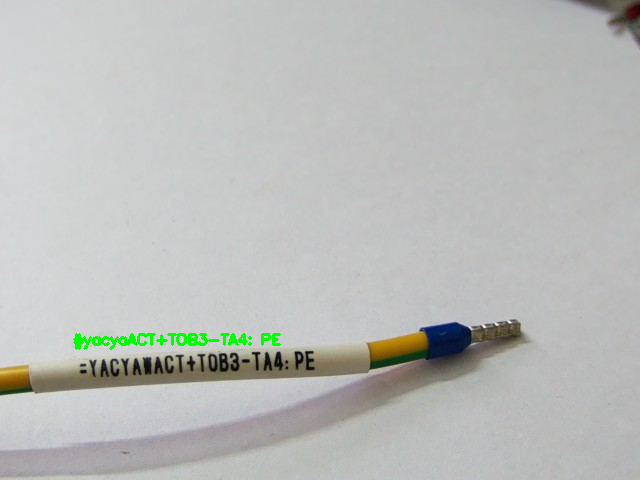

In [3]:
import numpy as np
from imutils.object_detection import non_max_suppression
import cv2
import easyocr
import os
import time
from google.colab.patches import cv2_imshow

# Replace the argparse section with the following lines
image_folder_path = '/content/drive/MyDrive/images'  # Provide the path to your image folder
east_path = '/content/drive/MyDrive/frozen_east_text_detection.pb'  # Provide the path to your EAST model

min_confidence = 0.5
width = 320
height = 320

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Loop through each image in the folder
for image_name in os.listdir(image_folder_path):
    if image_name.endswith('.jfif'):
        # Load the input image and grab the image dimensions
        image_path = os.path.join(image_folder_path, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load the image from {image_path}")
            continue

        orig = image.copy()
        (H, W) = image.shape[:2]

        # set the new width and height and then determine the ratio in change
        # for both the width and height
        (newW, newH) = (width, height)
        rW = W / float(newW)
        rH = H / float(newH)

        # resize the image and grab the new image dimensions
        image = cv2.resize(image, (newW, newH))
        (H, W) = image.shape[:2]

        # define the two output layer names for the EAST detector model
        layerNames = [
            "feature_fusion/Conv_7/Sigmoid",
            "feature_fusion/concat_3"]

        # load the pre-trained EAST text detector
        print("[INFO] loading EAST text detector...")
        net = cv2.dnn.readNet(east_path)

        # construct a blob from the image and then perform a forward pass
        # of the model to obtain the two output layer sets
        blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                                     (123.68, 116.78, 103.94), swapRB=True, crop=False)
        net.setInput(blob)

        # Measure the time taken for text detection
        start = time.time()
        (scores, geometry) = net.forward(layerNames)
        end = time.time()
        print("[INFO] text detection took {:.6f} seconds".format(end - start))

        # ... (rest of the script remains unchanged)

        # Use EasyOCR to perform OCR on the image
        results = reader.readtext(orig)

        # Display the detected text
        for (bbox, text, prob) in results:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            cv2.putText(orig, text, (int(top_left[0]), int(top_left[1])),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # show the output image
        cv2_imshow(orig)


In [ ]:
import os

# Ground truth folder
gt_folder_path = '/content/drive/MyDrive/gt'

# Function to read the ground truth text from .txt files
def read_ground_truth(image_name):
    gt_file_path = os.path.join(gt_folder_path, f"{os.path.splitext(image_name)[0]}.txt")
    try:
        with open(gt_file_path, 'r') as file:
            return file.read().strip()
    except FileNotFoundError:
        return ""



In [6]:
# Loop through each image in the folder
for image_name in os.listdir(image_folder_path):
    if image_name.endswith('.jfif'):
        # Load the input image and grab the image dimensions
        image_path = os.path.join(image_folder_path, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load the image from {image_path}")
            continue

        # Perform text detection using EasyOCR
        results = reader.readtext(image)

        # Extract detected text
        detected_text = [text for (_, text, _) in results]

        # Read ground truth text
        ground_truth = read_ground_truth(image_name)

        # Compare detected text with ground truth
        if ground_truth.lower() == ' '.join(detected_text).lower():
            print(f"Image {image_name}: Detection Correct")
        else:
            print(f"Image {image_name}: Detection Incorrect")
            print(f"  Detected Text: {' '.join(detected_text)}")
            print(f"  Ground Truth: {ground_truth}")


Image 362a6527-7d14-4c04-92a3-eee8b5c816fb.jfif: Detection Incorrect
  Detected Text: eAPSELESUP4TOB2-TBl: -
  Ground Truth: =APSELESUP+TOB2-TB1: +
Image c31a6148-24f7-4759-9211-251f223702bb.jfif: Detection Incorrect
  Detected Text: 11 FAPSELESUP+T0B2-KFB: `
  Ground Truth: =APSELESUP+T0B2-KF5: 11
Image d57ac422-bd32-4d21-91aa-37ff60ddfe3b.jfif: Detection Incorrect
  Detected Text: MI =APSELESUP+ TOB2-KFS:
  Ground Truth: =APSELESUP+TOB2-KF5: 11
Image cee69595-83fa-48d1-b2e5-ca95c550c6a6.jfif: Detection Incorrect
  Detected Text: N7: & +T082-KONI: =
  Ground Truth: +T0B2-XDN1:N7: a
Image bcbc9729-905e-4735-a8d5-6b241abf92e3.jfif: Detection Incorrect
  Detected Text: +TOB2 - XON } : NT: a
  Ground Truth: +TOB2-XDN1:N7: a
Image b35015ff-8849-4f18-835a-c0b076a69e7b.jfif: Detection Incorrect
  Detected Text: :APSELESUP4TOB2-TBI: =
  Ground Truth: =APSELESUP+TOB2-TB1: +
Image 39bb0721-4ebf-4e61-a208-53bb97e5f4d2.jfif: Detection Incorrect
  Detected Text: PPTRPWRTRN+ToB2-FC5:
  Ground Truth

In [8]:
from Levenshtein import distance as levenshtein_distance

# Function to calculate Character Error Rate (CER)
def calculate_cer(reference, hypothesis):
    len_ref = len(reference)
    len_hyp = len(hypothesis)

    # Calculate the Levenshtein distance between the reference and hypothesis
    dist = levenshtein_distance(reference, hypothesis)

    # CER is the Levenshtein distance normalized by the length of the reference
    cer = dist / max(len_ref, 1)

    return cer



# Loop through each image in the folder
for image_name in os.listdir(image_folder_path):
    if image_name.endswith('.jfif'):
        # Load the input image and grab the image dimensions
        image_path = os.path.join(image_folder_path, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load the image from {image_path}")
            continue

        # Perform text detection using EasyOCR
        results = reader.readtext(image)

        # Extract detected text
        detected_text = [text for (_, text, _) in results]

        # Read ground truth text
        ground_truth = read_ground_truth(image_name)

        # Initialize variables to count matches and mismatches
        match_count = sum(1 for a, b in zip(detected_text, ground_truth) if a == b)
        mismatch_count = len(detected_text) - match_count

        # Calculate CER character-wise
        cer = mismatch_count / max(len(ground_truth), 1)

        # Compare detected text with ground truth
        if cer == 0:
            print(f"Image {image_name}: Detection Correct")
        else:
            print(f"Image {image_name}: Detection Incorrect")
            print(f"  Detected Text: {detected_text}")
            print(f"  Ground Truth: {ground_truth}")
            print(f"  CER={cer * 100:.2f}%")


Image 362a6527-7d14-4c04-92a3-eee8b5c816fb.jfif: Detection Incorrect
  Detected Text: ['eAPSELESUP4TOB2-TBl: -']
  Ground Truth: =APSELESUP+TOB2-TB1: +
  CER=4.55%
Image c31a6148-24f7-4759-9211-251f223702bb.jfif: Detection Incorrect
  Detected Text: ['11', 'FAPSELESUP+T0B2-KFB: `']
  Ground Truth: =APSELESUP+T0B2-KF5: 11
  CER=8.70%
Image d57ac422-bd32-4d21-91aa-37ff60ddfe3b.jfif: Detection Incorrect
  Detected Text: ['MI', '=APSELESUP+', 'TOB2-KFS:']
  Ground Truth: =APSELESUP+TOB2-KF5: 11
  CER=13.04%
Image cee69595-83fa-48d1-b2e5-ca95c550c6a6.jfif: Detection Incorrect
  Detected Text: ['N7: &', '+T082-KONI: =']
  Ground Truth: +T0B2-XDN1:N7: a
  CER=12.50%
Image bcbc9729-905e-4735-a8d5-6b241abf92e3.jfif: Detection Incorrect
  Detected Text: ['+TOB2 - XON } : NT: a']
  Ground Truth: +TOB2-XDN1:N7: a
  CER=6.25%
Image b35015ff-8849-4f18-835a-c0b076a69e7b.jfif: Detection Incorrect
  Detected Text: [':APSELESUP4TOB2-TBI: =']
  Ground Truth: =APSELESUP+TOB2-TB1: +
  CER=4.55%
Image 39bb0